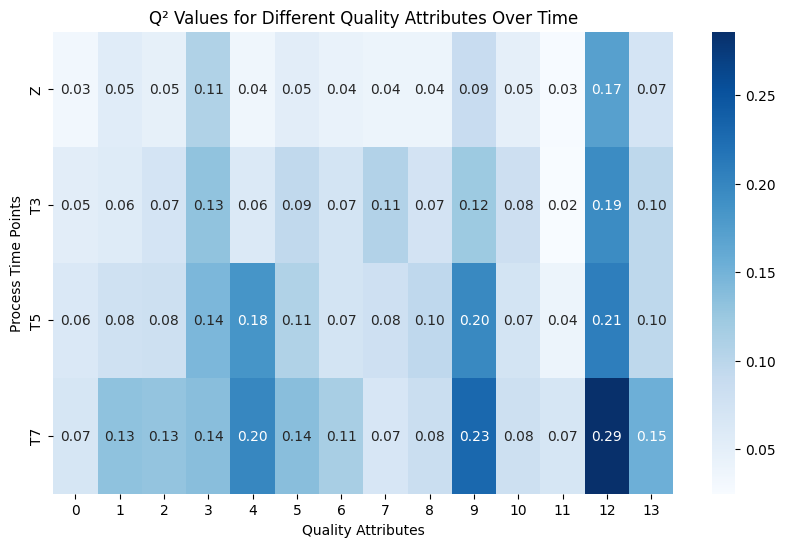

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# 模拟数据（替换为真实数据）
np.random.seed(42)
n_samples = 91
n_predictors = 20
n_quality_attrs = 14

X = np.random.randn(n_samples, n_predictors)  # 过程信息
Y = np.random.randn(n_samples, n_quality_attrs)  # 质量属性

# 进行 PLS1 回归并计算 Q²
def pls1_predict(X, Y, n_components=5):
    pls = PLSRegression(n_components=n_components)
    pls.fit(X, Y)
    Y_pred = pls.predict(X)
    return r2_score(Y, Y_pred, multioutput='raw_values')

# 自动缩放数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 不同时间点的过程数据
process_blocks = {
    'Z': X_scaled[:, :5],
    'T3': X_scaled[:, :10],
    'T5': X_scaled[:, :15],
    'T7': X_scaled[:, :20]
}

# 为每个质量属性构建 PLS1 模型
q2_values = {}
for time_point, X_block in process_blocks.items():
    q2_values[time_point] = pls1_predict(X_block, Y)

# 可视化结果
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(q2_values).T, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel("Quality Attributes")
plt.ylabel("Process Time Points")
plt.title("Q² Values for Different Quality Attributes Over Time")
plt.show()

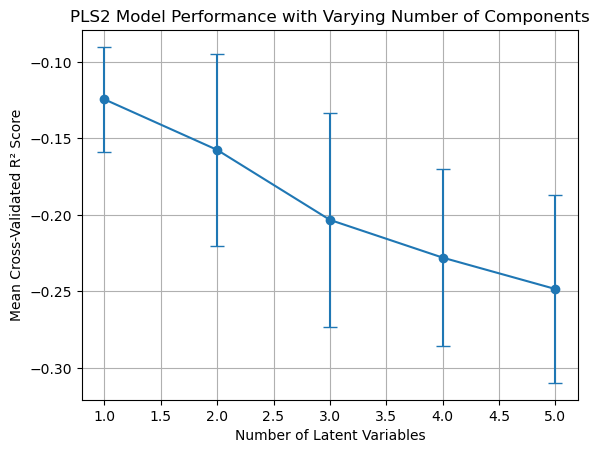

In [1]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, r2_score
import matplotlib.pyplot as plt

# 模拟数据生成
np.random.seed(42)
n_samples = 100
n_features = 10
n_targets = 5

X = np.random.normal(size=(n_samples, n_features))
Y = np.random.normal(size=(n_samples, n_targets))

# 定义 PLS2 模型
def pls2_model(X, Y, n_components, n_splits=5):
    pls2 = PLSRegression(n_components=n_components)
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(pls2, X, Y, cv=kf, scoring=make_scorer(r2_score, multioutput='uniform_average'))
    return np.mean(scores), np.std(scores)

# 选择不同数量的潜在变量
components_range = range(1, 6)
mean_scores = []
std_devs = []

for n_components in components_range:
    mean_score, std_dev = pls2_model(X, Y, n_components)
    mean_scores.append(mean_score)
    std_devs.append(std_dev)

# 绘制性能图
plt.errorbar(components_range, mean_scores, yerr=std_devs, fmt='-o', capsize=5)
plt.title('PLS2 Model Performance with Varying Number of Components')
plt.xlabel('Number of Latent Variables')
plt.ylabel('Mean Cross-Validated R² Score')
plt.grid(True)
plt.show()

L = 6.765817740407732
k = 0.7915486405783586
x0 = 6.0847948250732


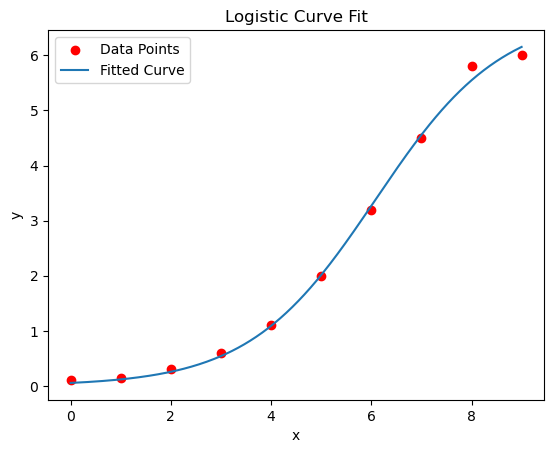

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 定义逻辑函数
def logistic(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

# 示例数据 (x值和y值)
xdata = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ydata = np.array([0.1, 0.15, 0.3, 0.6, 1.1, 2, 3.2, 4.5, 5.8, 6.0])

# 使用curve_fit进行逻辑函数拟合
params, covariance = curve_fit(logistic, xdata, ydata, p0=[max(ydata), 1, np.median(xdata)])

# 打印最优参数
print("L =", params[0])
print("k =", params[1])
print("x0 =", params[2])

# 绘制数据点
plt.scatter(xdata, ydata, color='red', label='Data Points')

# 绘制拟合曲线
xmodel = np.linspace(min(xdata), max(xdata), 300)
ymodel = logistic(xmodel, *params)
plt.plot(xmodel, ymodel, label='Fitted Curve')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Logistic Curve Fit')
plt.legend()
plt.show()


In [2]:
import numpy as np
import statsmodels.api as sm

# 生成一些测试数据
np.random.seed(0)
X = np.linspace(0, 10, 100)
y = 3 * X + np.random.normal(0, 2, 100) + 20 * np.random.binomial(1, 0.05, 100)  # 添加一些异常值

# 添加常数项
X = sm.add_constant(X)

# 拟合初始线性回归模型
model = sm.OLS(y, X).fit()

# 计算残差
residuals = np.abs(model.resid)

# 排序残差并找到削减点（例如削减最大的5%的数据点）
cutoff = np.percentile(residuals, 95)

# 保留残差小于削减点的数据
X_trimmed = X[residuals < cutoff]
y_trimmed = y[residuals < cutoff]

# 使用削减后的数据重新拟合模型
trimmed_model = sm.OLS(y_trimmed, X_trimmed).fit()

# 打印两个模型的参数进行比较
print("Original model params:", model.params)
print("Trimmed model params:", trimmed_model.params)

Original model params: [0.98723993 2.94647522]
Trimmed model params: [0.81313215 2.88825453]


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 假设有一些示例数据
X = np.random.rand(100, 10)  # 100个样本，10个特征
y = np.random.rand(100)      # 100个目标值

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化模型
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 使用交叉验证调整模型
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# 训练模型
model.fit(X_train, y_train)

# 在测试集上预测
y_pred = model.predict(X_test)

# 计算RMSEP
rmsep = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error of Prediction (RMSEP): {rmsep:.4f}")

# 输出交叉验证得分
print(f"Cross-validation scores (MSE): {scores}")
print(f"Mean Cross-validation score (MSE): {np.mean(scores)}")

Root Mean Squared Error of Prediction (RMSEP): 0.3196
Cross-validation scores (MSE): [-0.08413335 -0.10340811 -0.09370041 -0.17144009 -0.09434413]
Mean Cross-validation score (MSE): -0.10940521438082777


In [5]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

# 生成一些回归数据
X, y = make_regression(n_samples=100, n_features=10, noise=0.1)

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 设置不同的模型配置
models = {
    'RandomForestRegressor': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [10, 20]
        }
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1.0]
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['rbf']
        }
    }
}

# 使用GridSearchCV进行交叉验证和超参数调整
for model_name, model_setup in models.items():
    grid_search = GridSearchCV(model_setup['model'], model_setup['params'], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    y_pred = grid_search.predict(X_test)
    rmsep = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{model_name} RMSEP: {rmsep:.4f}")


Best parameters for RandomForestRegressor: {'max_depth': 10, 'n_estimators': 100}
RandomForestRegressor RMSEP: 91.2425
Best parameters for Ridge: {'alpha': 0.1}
Ridge RMSEP: 0.2250
Best parameters for SVR: {'C': 10, 'kernel': 'rbf'}
SVR RMSEP: 141.9000
